# lec06_이미지 증강(img augmentation)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,mean_squared_error,f1_score

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.layers import Dropout, Conv2D, MaxPool2D, Flatten, Dense
from keras.initializers import GlorotNormal,HeNormal,   RandomNormal, Zeros, Identity , Orthogonal , Constant , VarianceScaling


In [4]:
tf.random.set_seed(1)
np.random.seed(1)

# data load

In [5]:
from keras.datasets import mnist

In [23]:
(X_train,y_train),(X_val, y_val) = mnist.load_data()  # (trainset), (testset)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

# model

In [18]:
model = Sequential()


#-----------------CNN


model.add(Conv2D(filters=16, input_shape=(28,28,1), kernel_size=(5,5), strides=(1, 1),padding='valid',activation="relu",kernel_initializer='glorot_uniform'))
# 내보내는 필터갯수가 16 
model.add(MaxPool2D(pool_size=(2, 2),strides=None,padding='valid',data_format=None))
# 필터 갯수 지정 안 한다, 사이즈 조정만 하는 거니까
model.add(Conv2D(filters=16, kernel_size=(5,5),activation="relu"))
# 내보내는 필터갯수가 16 
model.add(MaxPool2D(pool_size=(2, 2)))


#-----------------Fully Connected

model.add(Flatten())
model.add(Dense(units=50,  activation='relu'))    
model.add(Dense(units=10,  activation='softmax')) 
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          6416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 50)                1

# 이미지증강
<pre>
* keras  : https://keras.io/api/preprocessing/image/
* PIL    : https://pillow.readthedocs.io/en/stable/
* oepncv : https://docs.opencv.org/4.x/
* 배치생성 --> 배치 단위로 루프 --> <b>학습(fit) 시 순환하면서 데이터 증강</b>
* 데이터 증강 : 입력한 파라미터를 랜덤하게 적용해서 batch_size만큼 복원추출  (아예 모두 적용 안한 원본사이즈도 추출가능) 
     - batch_size 지정 안하면 >> 무한 증강

In [9]:
from keras.preprocessing.image import ImageDataGenerator

<pre>
<B>keras.preprocessing.image.ImageDataGenerator(
     rotation_range=0,                        회전
     width_shift_range=0.0,                   이미지 밀기(좌우)                  
     height_shift_range=0.0,                  이미지 밀기(상하)
     brightness_range=None,                   밝기
     zca_whitening=False,                     밝기
     zoom_range=0.0,                          확대/축소 
     fill_mode='nearest', cval=0.0,           빈픽셀 채우기          
     horizontal_flip=False,                   가로 대칭
     vertical_flip=False,                     세로 대칭
     rescale=None,                            /255.0 
     validation_split=0.0,                    8:2</B>
     featurewise_center=False,                이미지 센터에 위치
     samplewise_center=False,                      
     featurewise_std_normalization=False,     색상정규화
     samplewise_std_normalization=False, 
     zca_epsilon=1e-06, 
     shear_range=0.0,                         0~45 각도내 변환
     channel_shift_range=0.0,                 색상보정
     preprocessing_function=None,             
     data_format=None,                 
     dtype=None)

* flow(x, y=None, batch_size=32, shuffle=True, sample_weight=None, seed=None, save_to_dir=None, save_prefix='', save_format='png', subset=None)

<pre>
* <b>flow_from_directory(directory, target_size=(256, 256), class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, </b>
                    color_mode='rgb', classes=None,  save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest')

In [20]:
X_train_cp = X_train[:6]
y_train_cp = y_train[:6]
X_train_cp.shape, y_train_cp.shape

((6, 28, 28), (6,))

In [21]:
datagen = ImageDataGenerator(rotation_range=50)
X_train_cp = X_train_cp.reshape(-1,28,28,1)
print(X_train_cp.shape)

(6, 28, 28, 1)


In [16]:
y_train_cp

array([5], dtype=uint8)

Epoch: 0 
1/1 [==============================] - 0s 7ms/step - loss: 27.9590 - accuracy: 0.0000e+00


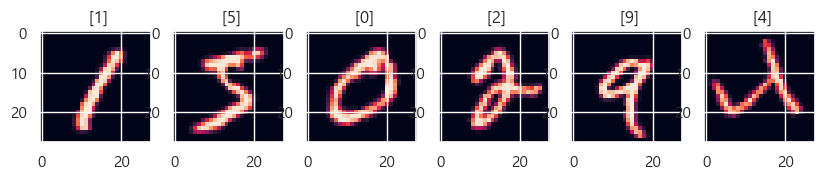

Epoch: 1 
1/1 [==============================] - 0s 8ms/step - loss: 0.0015 - accuracy: 1.0000


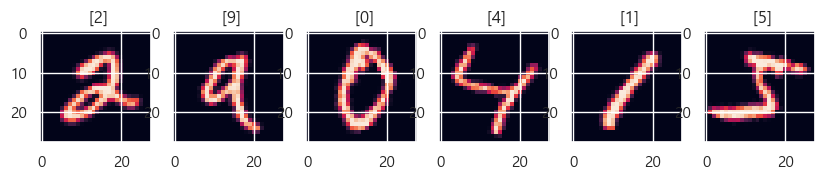

In [22]:
EPOCHS = 2
for e in range(EPOCHS):
    plt.figure(figsize=(10,5))
    
    batches = 0
    print(f"Epoch: {e} ")
    for x_batch, y_batch in datagen.flow(X_train_cp, y_train_cp, batch_size=1):
        model.fit(x_batch, y_batch)
        
        batches += 1 
        
        plt.subplot(1, len(X_train_cp), batches)
        plt.imshow(x_batch.reshape(28,28))
        plt.title(f" {y_batch}")
        
        if batches >= len(X_train_cp) / 1:  #step_per_epoch
            break
    plt.show()

In [29]:
(X_train,y_train),(X_val, y_val) = mnist.load_data()  # (trainset), (testset)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [30]:
X_train = X_train.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)
X_train.shape,X_val.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [34]:
train_generator = ImageDataGenerator(
     rotation_range=10,                        
     width_shift_range=0.1,                                
     height_shift_range=0.1,                
     brightness_range=None,                   
     zca_whitening=True,                  
     zoom_range=0.1,                        
     fill_mode='nearest', cval=0.1,                   
     horizontal_flip=True,                  
     vertical_flip=True)

val_generator = ImageDataGenerator(
     rotation_range=10,                        
     width_shift_range=0.1,                                
     height_shift_range=0.1,                
     brightness_range=None,                   
     zca_whitening=True,                  
     zoom_range=0.1,                        
     fill_mode='nearest', cval=0.1,                   
     horizontal_flip=True,                  
     vertical_flip=True)

test_generator =  ImageDataGenerator(rescale = 1./255.)

BATCH_SIZE = 256

train_flow_iter = train_generator.flow(X_train,y_train,batch_size = BATCH_SIZE)
val_flow_iter = val_generator.flow(X_val,y_val,batch_size = BATCH_SIZE)
# test_flow_iter  = test_generator.flow(X_test,y_test)


fit_hisroty = model.fit(train_flow_iter
         ,epochs = 5
         ,steps_per_epoch = len(X_train)/BATCH_SIZE
         ,validation_data =val_flow_iter )

Epoch 1/5
234/234 [==============================] - 24s 101ms/step - loss: 0.5422 - accuracy: 0.8210 - val_loss: 0.4780 - val_accuracy: 0.8419
Epoch 2/5
234/234 [==============================] - 24s 102ms/step - loss: 0.5062 - accuracy: 0.8338 - val_loss: 0.4411 - val_accuracy: 0.8526
Epoch 3/5
234/234 [==============================] - 26s 109ms/step - loss: 0.4613 - accuracy: 0.8493 - val_loss: 0.4071 - val_accuracy: 0.8628
Epoch 4/5
234/234 [==============================] - 25s 106ms/step - loss: 0.4316 - accuracy: 0.8594 - val_loss: 0.3813 - val_accuracy: 0.8748
Epoch 5/5
234/234 [==============================] - 25s 107ms/step - loss: 0.4172 - accuracy: 0.8633 - val_loss: 0.3878 - val_accuracy: 0.8716


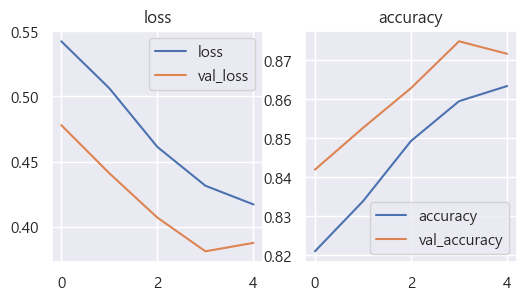

In [35]:
plt.figure(figsize=(6,3))
ax1 = plt.subplot(1,2,1)
ax1.plot(fit_hisroty.history['loss']    , label='loss')
ax1.plot(fit_hisroty.history['val_loss'], label='val_loss')
ax1.legend()
ax1.set_title("loss")

ax2 = plt.subplot(1,2,2)
ax2.plot(fit_hisroty.history['accuracy']    , label='accuracy')
ax2.plot(fit_hisroty.history['val_accuracy'], label='val_accuracy')
ax2.legend()
ax2.set_title("accuracy")

plt.show()

# predict

In [21]:
fit_hisroty = model.fit(X_train_sc, y_train
                        , batch_size = 128
                        , validation_split=0.2, epochs=10)
print(fit_hisroty)
print ( model.evaluate(X_test_sc, y_test)  )
# [0.03670008108019829, 0.9873999953269958]

Epoch 1/10
375/375 [==============================] - 12s 29ms/step - loss: 0.3837 - accuracy: 0.8850 - val_loss: 0.1216 - val_accuracy: 0.9653
Epoch 2/10
375/375 [==============================] - 10s 28ms/step - loss: 0.1096 - accuracy: 0.9671 - val_loss: 0.1011 - val_accuracy: 0.9701
Epoch 3/10
375/375 [==============================] - 11s 28ms/step - loss: 0.0791 - accuracy: 0.9765 - val_loss: 0.0692 - val_accuracy: 0.9799
Epoch 4/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0616 - accuracy: 0.9809 - val_loss: 0.0595 - val_accuracy: 0.9829
Epoch 5/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0532 - accuracy: 0.9834 - val_loss: 0.0545 - val_accuracy: 0.9843
Epoch 6/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0444 - accuracy: 0.9860 - val_loss: 0.0615 - val_accuracy: 0.9814
Epoch 7/10
375/375 [==============================] - 11s 31ms/step - loss: 0.0420 - accuracy: 0.9868 - val_loss: 0.0533 - val_accuracy:

# 예측

## 예측

In [ ]:
proba = model.predict(X_test_sc)
y_test.shape

In [ ]:
pred = np.argmax(proba, axis=1)
y_test = np.argmax(y_test, axis=1)
print(pred[:3], y_test)